In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/all_seasons_2021-2025_raw_visualization_data'
df = pd.read_excel(file_path)

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())



Dataset shape: (1472, 278)

First few rows:
        Date            Home   xG  xG.1            Away  Attendance  \
0 2021-08-13       Brentford  1.2   1.3         Arsenal     16479.0   
1 2021-08-14  Manchester Utd  1.5   0.5    Leeds United     72732.0   
2 2021-08-14         Everton  2.4   0.8     Southampton     38487.0   
3 2021-08-14  Leicester City  0.5   1.3          Wolves     31983.0   
4 2021-08-14         Chelsea  0.7   0.2  Crystal Palace     38965.0   

          Home_clean      Away_clean  MP-H.1  xG-H.1  ...  PrgC-A  CPA-A  \
0          Brentford         Arsenal      38    45.8  ...     556    140   
1  Manchester United    Leeds United      38    55.8  ...     700    208   
2            Everton     Southampton      38    41.2  ...     647    187   
3     Leicester City          Wolves      38    47.8  ...     780    190   
4            Chelsea  Crystal Palace      38    63.4  ...     563    135   

   Mis-A  Dis-A  Rec-A  PrgR-A  HomeGoals  AwayGoals  Result     Season 

In [ ]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display only columns with missing values
null_counts = null_counts[null_counts > 0]

if null_counts.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing values detected:")
    print(null_counts)


Missing values detected:
Attendance       1
PKatt-H.1      712
PrgP-H.1       332
90s-H.1        760
PrgDist-H.1    712
np:G-xG-H       19
90s-A.1        760
90s-A.2        760
# Pl-A         760
90s-A          380
Glsv-A         712
G/So-A         712
dtype: int64


In [ ]:
# Drop columns with more than 20 missing values
threshold = 20
df = df.dropna(axis=1, thresh=len(df) - threshold)

# Confirm remaining columns and shape
print("Remaining columns after dropping:")
print(df.columns)
print("New dataset shape:", df.shape)


Remaining columns after dropping:
Index(['Date', 'Home', 'xG', 'xG.1', 'Away', 'Attendance', 'Home_clean',
       'Away_clean', 'MP-H.1', 'xG-H.1',
       ...
       'PrgC-A', 'CPA-A', 'Mis-A', 'Dis-A', 'Rec-A', 'PrgR-A', 'HomeGoals',
       'AwayGoals', 'Result', 'Season'],
      dtype='object', length=268)
New dataset shape: (1472, 268)


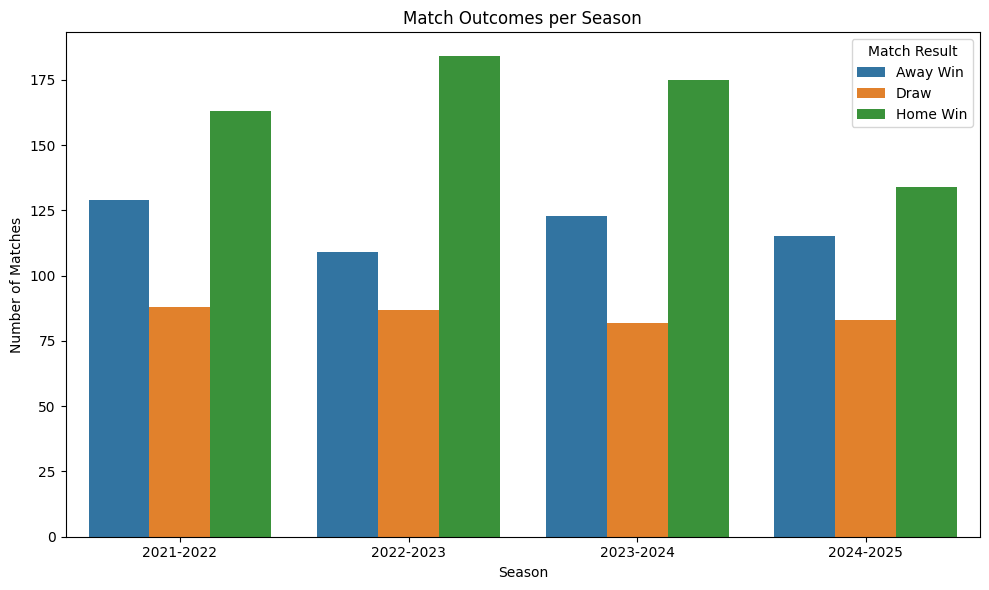

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Season and Result
result_counts = df.groupby(['Season', 'Result']).size().reset_index(name='MatchCount')

# Map result labels
result_map = {1: 'Home Win', 0: 'Draw', -1: 'Away Win'}
result_counts['ResultLabel'] = result_counts['Result'].map(result_map)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=result_counts, x='Season', y='MatchCount', hue='ResultLabel')
plt.title('Match Outcomes per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(title='Match Result')
plt.tight_layout()
plt.show()


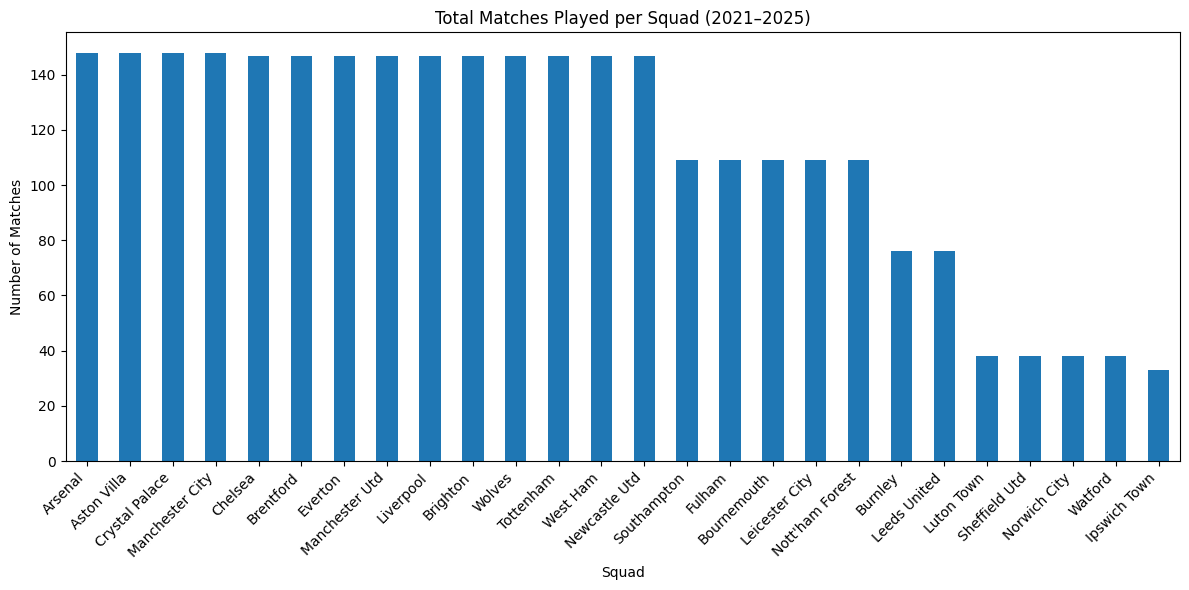

In [ ]:
import matplotlib.pyplot as plt

# Count how many times each team appeared as Home or Away
home_counts = df['Home'].value_counts()
away_counts = df['Away'].value_counts()

# Sum both counts
total_matches_per_squad = (home_counts + away_counts).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
total_matches_per_squad.plot(kind='bar')
plt.title('Total Matches Played per Squad (2021–2025)')
plt.xlabel('Squad')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


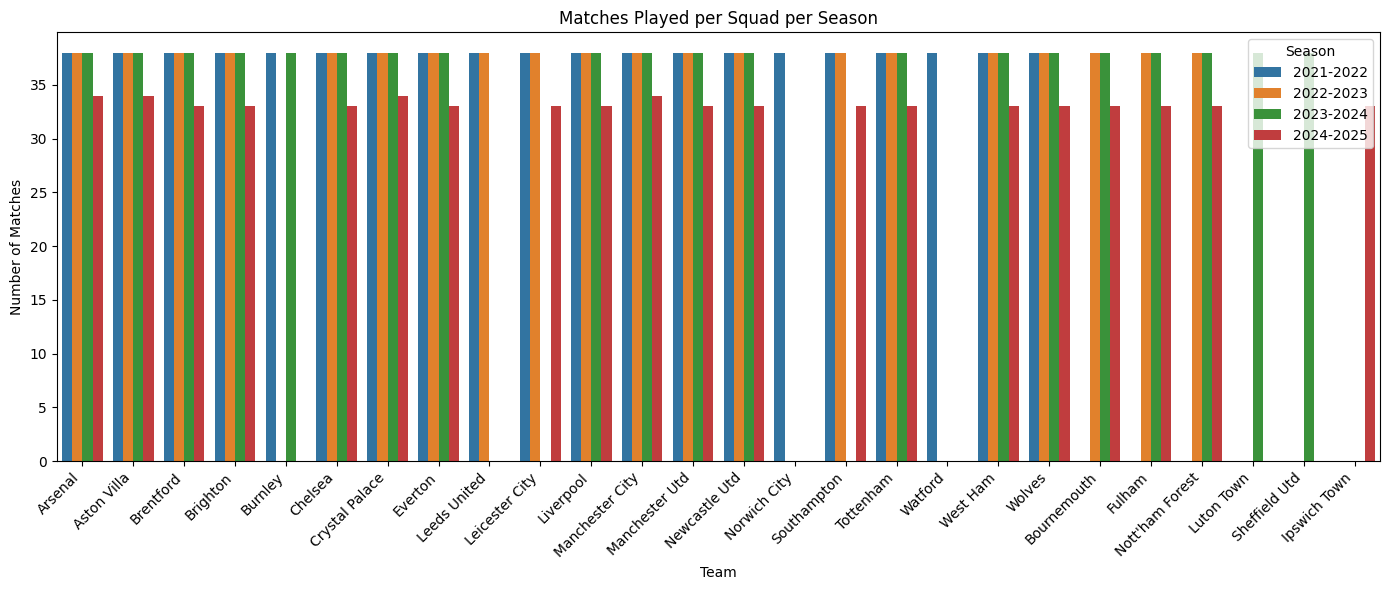

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count home and away matches per team per season
home_counts = df.groupby(['Season', 'Home']).size().reset_index(name='HomeMatches')
away_counts = df.groupby(['Season', 'Away']).size().reset_index(name='AwayMatches')

# Merge and sum home + away
team_season_counts = pd.merge(home_counts, away_counts, left_on=['Season', 'Home'], right_on=['Season', 'Away'], how='outer')
team_season_counts['Team'] = team_season_counts['Home'].combine_first(team_season_counts['Away'])
team_season_counts['Matches'] = team_season_counts['HomeMatches'].fillna(0) + team_season_counts['AwayMatches'].fillna(0)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=team_season_counts, x='Team', y='Matches', hue='Season')
plt.title('Matches Played per Squad per Season')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season')
plt.tight_layout()
plt.show()


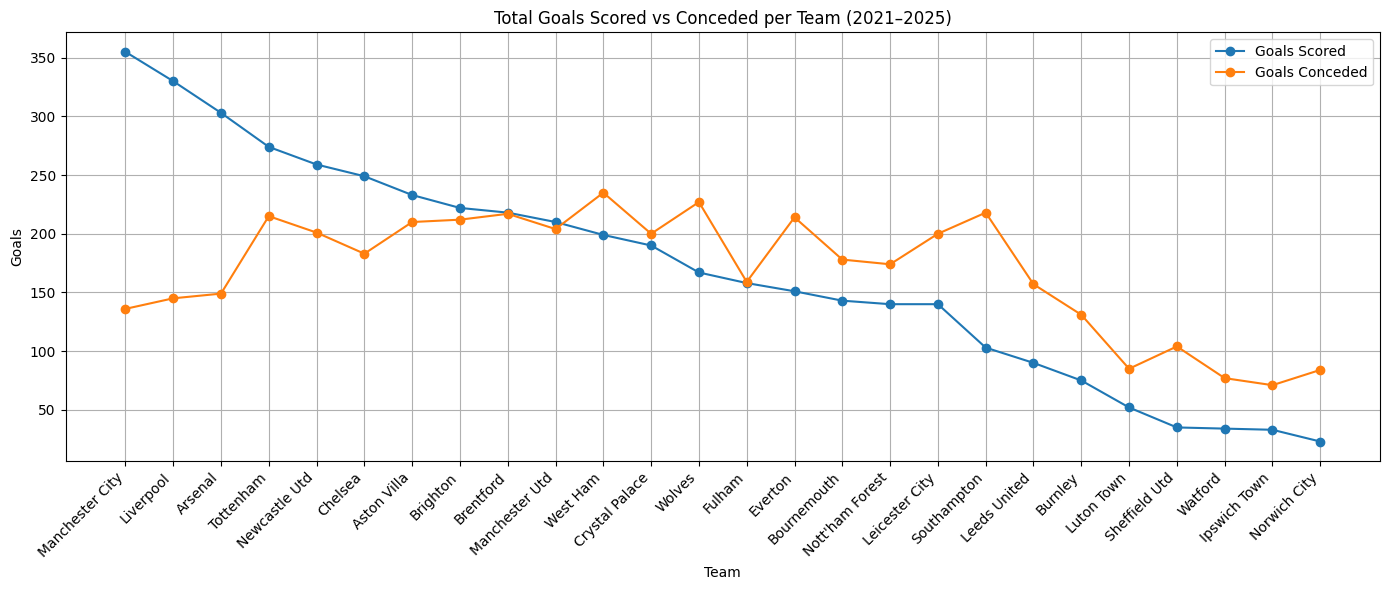

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate total goals scored and conceded per team
goals_scored = df.groupby('Home')['HomeGoals'].sum() + df.groupby('Away')['AwayGoals'].sum()
goals_conceded = df.groupby('Home')['AwayGoals'].sum() + df.groupby('Away')['HomeGoals'].sum()

# Combine into one DataFrame
team_goals = pd.DataFrame({
    'Goals Scored': goals_scored,
    'Goals Conceded': goals_conceded
}).fillna(0)

# Sort by goals scored for consistent x-axis
team_goals = team_goals.sort_values(by='Goals Scored', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(team_goals.index, team_goals['Goals Scored'], marker='o', label='Goals Scored')
plt.plot(team_goals.index, team_goals['Goals Conceded'], marker='o', label='Goals Conceded')
plt.title('Total Goals Scored vs Conceded per Team (2021–2025)')
plt.xlabel('Team')
plt.ylabel('Goals')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


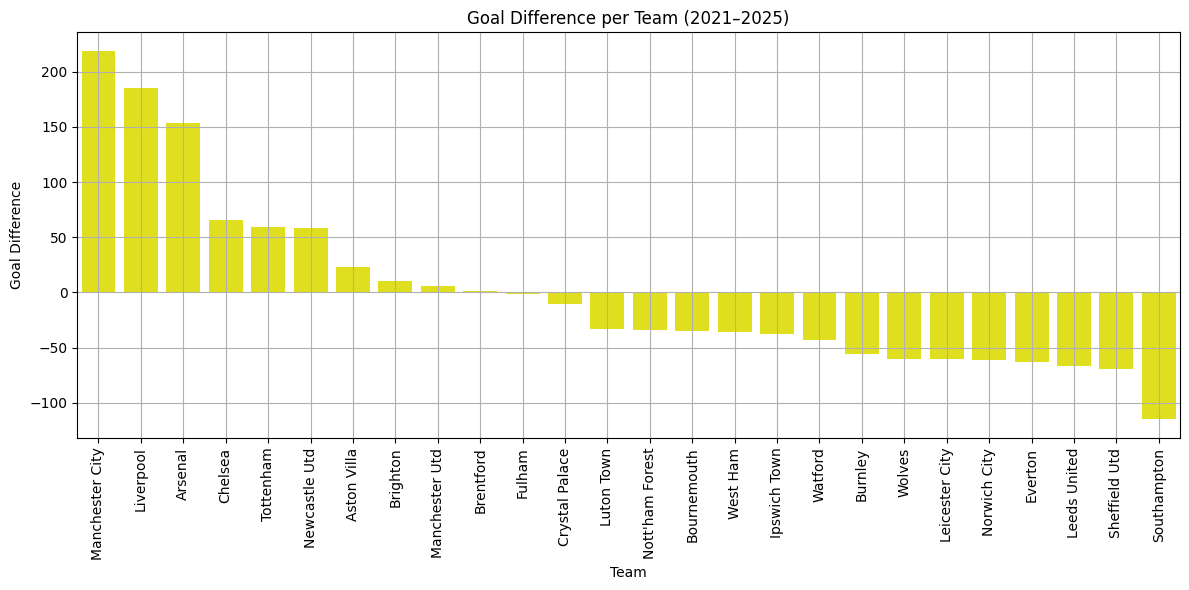

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate total goals scored and conceded per team
goals_scored = df.groupby('Home')['HomeGoals'].sum() + df.groupby('Away')['AwayGoals'].sum()
goals_conceded = df.groupby('Home')['AwayGoals'].sum() + df.groupby('Away')['HomeGoals'].sum()

# Create DataFrame
goal_diff_df = pd.DataFrame({
    'Team': goals_scored.index,
    'Goals Scored': goals_scored.values,
    'Goals Conceded': goals_conceded.values
})
goal_diff_df['Goal Difference'] = goal_diff_df['Goals Scored'] - goal_diff_df['Goals Conceded']
goal_diff_df = goal_diff_df.sort_values('Goal Difference', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Goal Difference', data=goal_diff_df, color='yellow')
plt.title('Goal Difference per Team (2021–2025)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


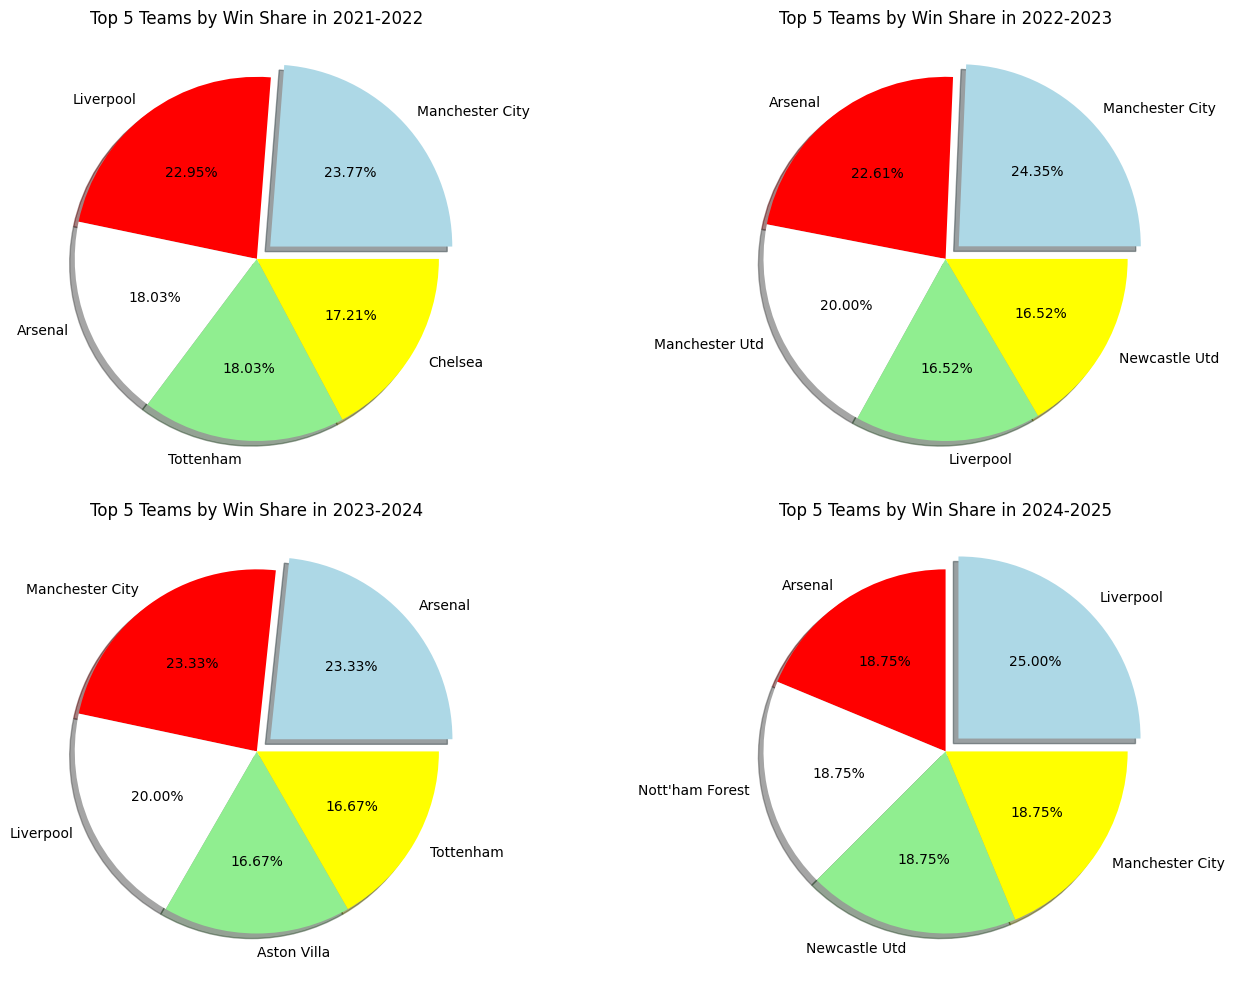

In [ ]:
# Re-import necessary modules and reload data after reset
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset again
file_path = '/content/all_seasons_2021-2025_raw_visualization_data'
df = pd.read_excel(file_path)

# Prepare a subplot per season
seasons = df['Season'].unique()
seasons.sort()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, season in enumerate(seasons):
    df_season = df[df['Season'] == season]

    # Count wins per team
    home_wins = df_season[df_season['Result'] == 1]['Home'].value_counts()
    away_wins = df_season[df_season['Result'] == -1]['Away'].value_counts()
    total_wins = (home_wins + away_wins).fillna(0)

    # Top 5 teams by win count
    top5 = total_wins.sort_values(ascending=False).head(5)
    teams = top5.index
    win_counts = top5.values

    # Pie chart
    colors = ['lightblue', 'red', 'white', 'lightgreen', 'yellow']
    explode = (0.1, 0, 0, 0, 0)

    axes[i].pie(win_counts, labels=teams, autopct='%1.2f%%', explode=explode,
                shadow=True, colors=colors)
    axes[i].set_title(f"Top 5 Teams by Win Share in {season}")

plt.tight_layout()
plt.show()


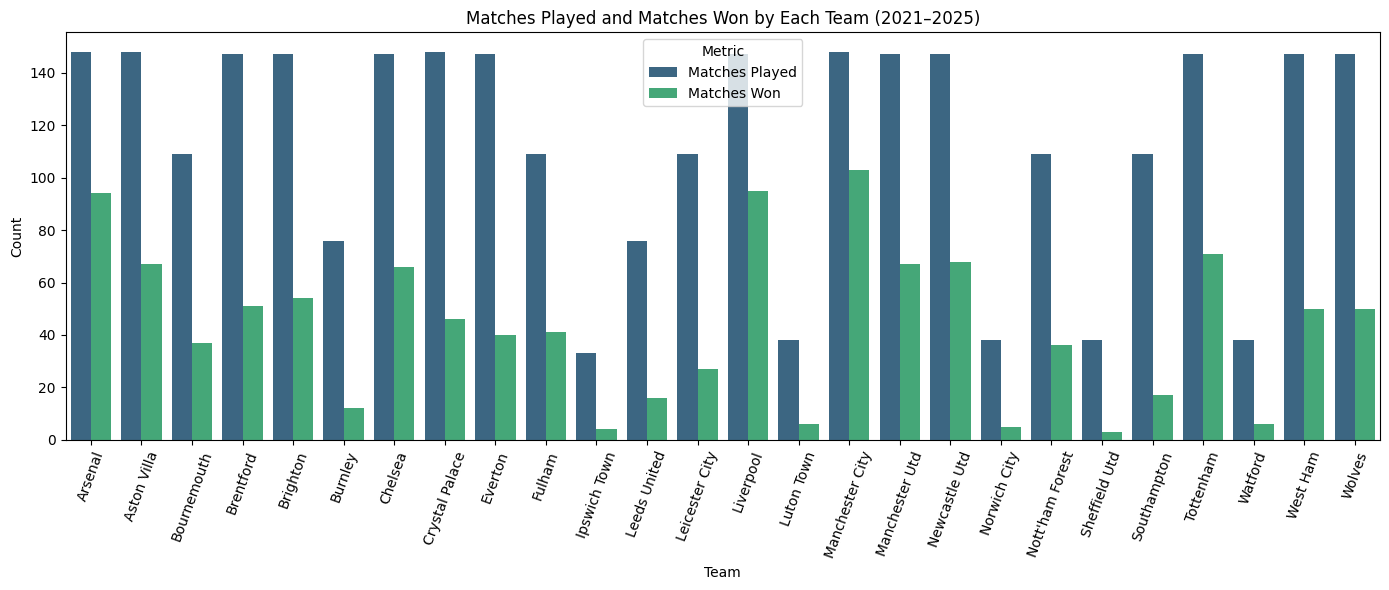

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total matches played: home + away counts
home_played = df['Home'].value_counts()
away_played = df['Away'].value_counts()
matches_played = (home_played + away_played).fillna(0)

# Total matches won: home wins (Result = 1), away wins (Result = -1)
home_wins = df[df['Result'] == 1]['Home'].value_counts()
away_wins = df[df['Result'] == -1]['Away'].value_counts()
matches_won = (home_wins + away_wins).fillna(0)

# Combine into DataFrame
team_stats = pd.DataFrame({
    'Team': matches_played.index,
    'Matches Played': matches_played.values,
    'Matches Won': matches_won.reindex(matches_played.index).fillna(0).values
})

# Melt for plotting
team_stats_melted = team_stats.melt(id_vars='Team', value_vars=['Matches Played', 'Matches Won'],
                                    var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=team_stats_melted, x='Team', y='Value', hue='Metric', palette='viridis')
plt.title('Matches Played and Matches Won by Each Team (2021–2025)')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


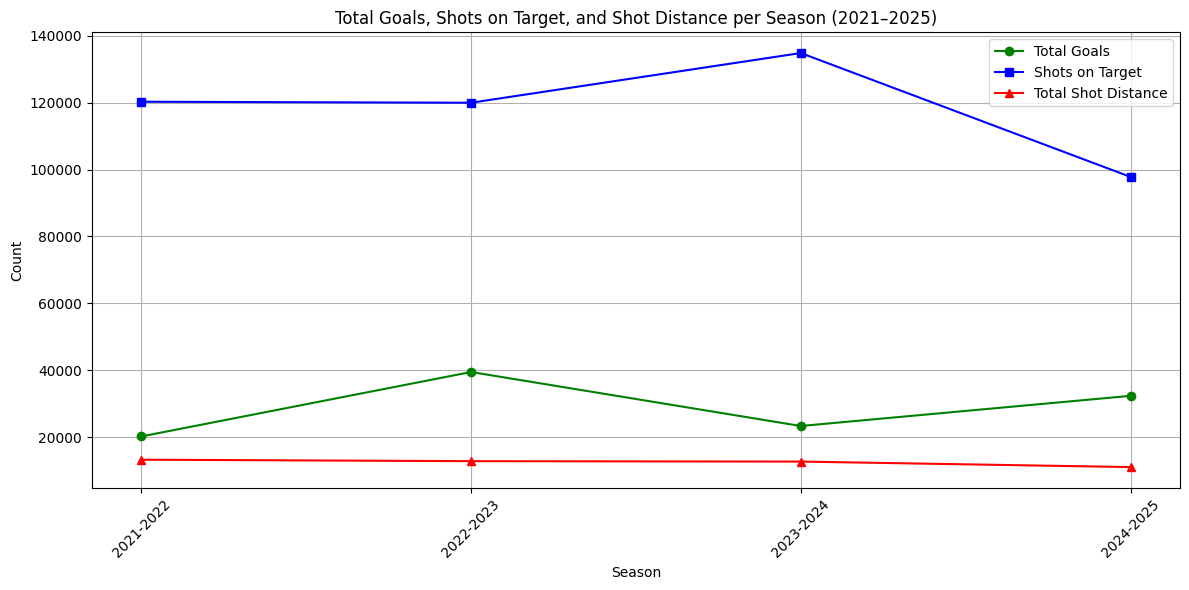

In [ ]:
# Convert 'Season' to a consistent string format
df['Season'] = df['Season'].astype(str)

# Aggregate total goals and shot-related stats per season
season_stats = df.groupby('Season').agg({
    'Gls-H': 'sum',
    'Gls-A': 'sum',
    'SoT-H': 'sum',
    'SoT-A': 'sum',
    'Dist-H': 'sum',
    'Dist-A': 'sum'
}).reset_index()

# Rename and compute totals
season_stats['Total Goals'] = season_stats['Gls-H'] + season_stats['Gls-A']
season_stats['Shots on Target'] = season_stats['SoT-H'] + season_stats['SoT-A']
season_stats['Total Shot Distance'] = season_stats['Dist-H'] + season_stats['Dist-A']

# Final columns to plot
season_stats_final = season_stats[['Season', 'Total Goals', 'Shots on Target', 'Total Shot Distance']]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(season_stats_final['Season'], season_stats_final['Total Goals'], label='Total Goals', color='green', marker='o')
plt.plot(season_stats_final['Season'], season_stats_final['Shots on Target'], label='Shots on Target', color='blue', marker='s')
plt.plot(season_stats_final['Season'], season_stats_final['Total Shot Distance'], label='Total Shot Distance', color='red', marker='^')

plt.title("Total Goals, Shots on Target, and Shot Distance per Season (2021–2025)")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


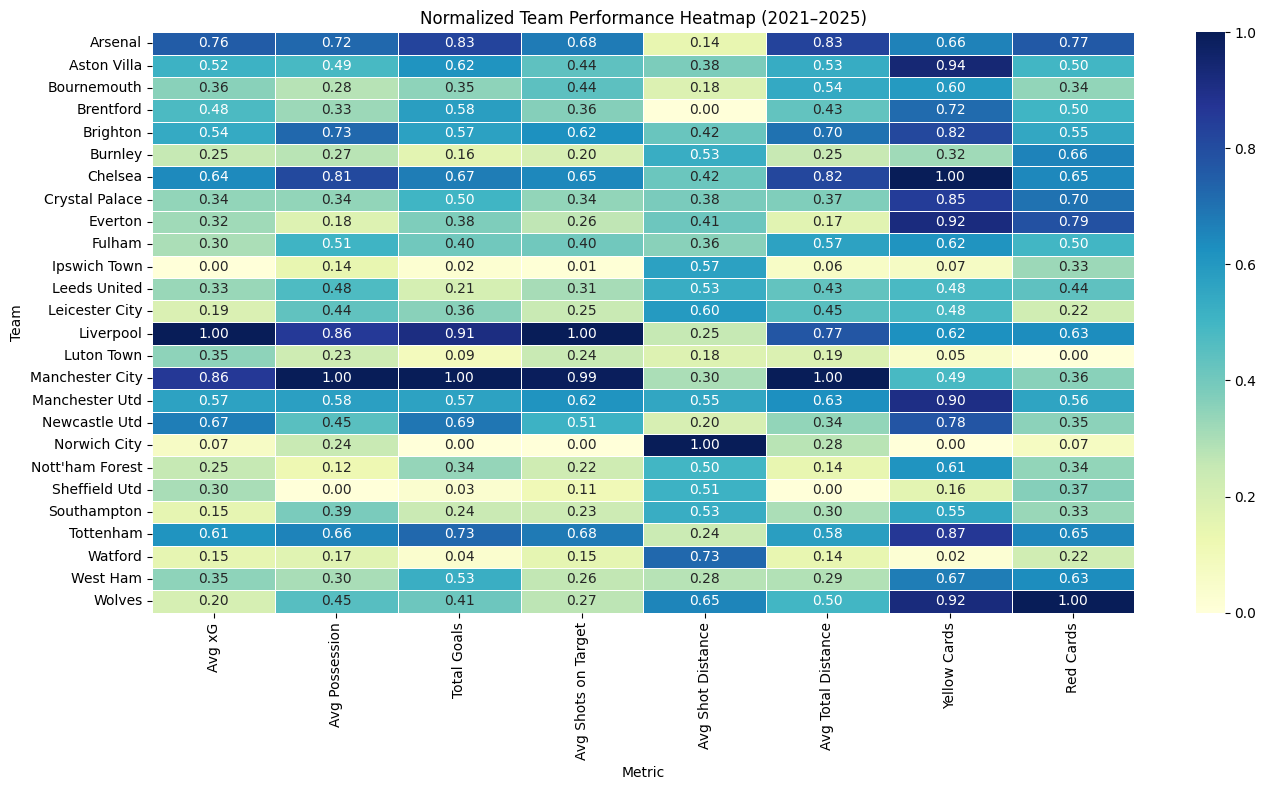

In [ ]:
import seaborn as sns

# Calculate average stats per team across all seasons
df['Team'] = df['Home']  # use 'Home' to represent the team stats for simplicity

# Aggregate team stats
team_summary = df.groupby('Team').agg({
    'xG-H': 'mean',
    'Poss-H': 'mean',
    'Gls-H': 'sum',
    'SoT-H': 'mean',
    'Dist-H': 'mean',
    'TotDist-H': 'mean',
    'CrdY-H': 'sum',
    'CrdR-H': 'sum'
}).reset_index()

# Rename for clarity
team_summary.columns = ['Team', 'Avg xG', 'Avg Possession', 'Total Goals', 'Avg Shots on Target',
                        'Avg Shot Distance', 'Avg Total Distance', 'Yellow Cards', 'Red Cards']

# Melt for heatmap
heatmap_data = team_summary.set_index('Team')

# Normalize the data for better color contrast
normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(normalized, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Normalized Team Performance Heatmap (2021–2025)')
plt.ylabel('Team')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_excel('all_seasons_2021-2025_raw_visualization_data.xlsx')

# Aggregate goals per team per season
home_goals = df.groupby(['Season', 'Home'])['HomeGoals'].sum().reset_index()
home_goals.columns = ['Season', 'Team', 'Goals_H']

away_goals = df.groupby(['Season', 'Away'])['AwayGoals'].sum().reset_index()
away_goals.columns = ['Season', 'Team', 'Goals_A']

# Merge and calculate total
total_goals = pd.merge(home_goals, away_goals, on=['Season', 'Team'], how='outer').fillna(0)
total_goals['TotalGoals'] = total_goals['Goals_H'] + total_goals['Goals_A']
total_goals = total_goals[['Season', 'Team', 'TotalGoals']]

# Create the animation
fig = px.bar(
    total_goals.sort_values(['Season', 'TotalGoals'], ascending=[True, False]),
    x='Team', y='TotalGoals', color='Team',
    animation_frame='Season',
    range_y=[0, total_goals['TotalGoals'].max() + 10],
    title='Top Scoring Teams per Season (2021–2025)',
    labels={'TotalGoals': 'Total Goals'},
    height=600
)

# Set slower animation transition and frame duration (in milliseconds)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 4000  # 2 seconds per frame
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 3000  # 1 sec transition

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


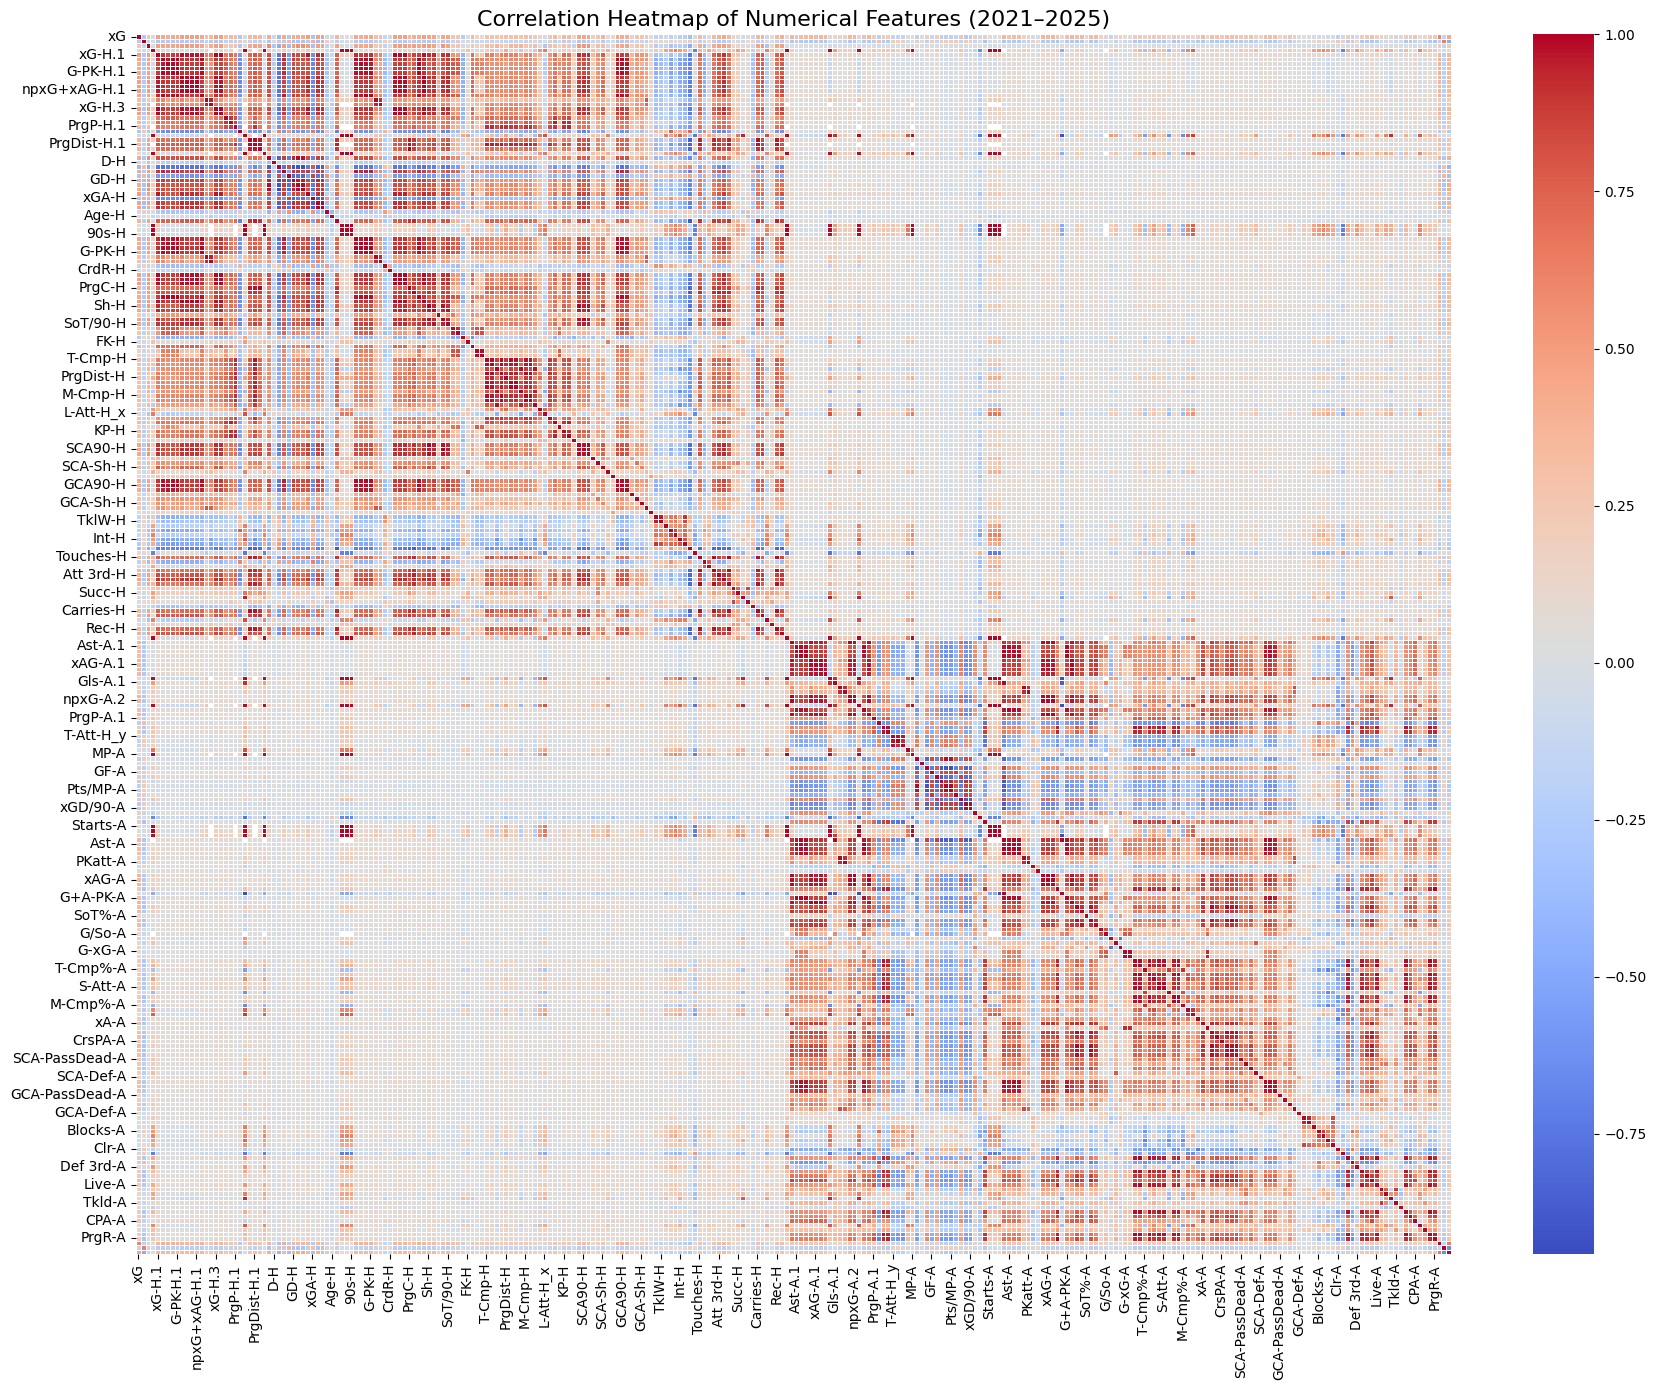

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features (2021–2025)', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Compute full correlation matrix
corr_matrix = numeric_df.corr()

# 1. Identify features weakly correlated with the target
target_corr = corr_matrix['Result'].abs()
low_corr_features = target_corr[target_corr < 0.05].index.tolist()

# 2. Identify highly correlated feature pairs (redundant)
upper_tri = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
redundant_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

# 3. Combine and drop both types
features_to_drop = list(set(low_corr_features + redundant_features))
df_reduced = df.drop(columns=features_to_drop)

# 4. Report
print("Dropped due to low correlation with 'Result':", low_corr_features)
print("Dropped due to high correlation with other features:", redundant_features)
print("Final shape of cleaned dataset:", df_reduced.shape)


Dropped due to low correlation with 'Result': ['MP-H.1', '90s-H.1', 'MP-H', 'D-H', 'Age-H', 'Starts-H', 'Min-H', '90s-H', 'Def 3rd-H', 'Succ%-H', 'Tkld-H', 'MP-A.1', '90s-A.1', '90s-A.2', 'MP-A', 'D-A', 'Age-A', 'Starts-A', 'Min-A', '90s-A', 'SoT%-A', 'Tackle-Tkl-A', 'TklW-A', 'Pass-A', 'Tkl+Int-A', 'Succ%-A', 'Tkld%-A']
Dropped due to high correlation with other features: ['Ast-H.1', 'G+A-H.1', 'G-PK-H.1', 'xG-H.2', 'xAG-H.1', 'npxG-H.1', 'npxG+xAG-H.1', 'Gls-H.2', 'xG-H.3', 'npxG-H.2', '90s-H.1', 'PrgDist-H.1', 'PrgC-H.1', 'MP-H', 'GF-H', 'Pts-H', 'Pts/MP-H', 'xG-H', 'xGD/90-H', 'Starts-H', 'Min-H', '90s-H', 'Gls-H', 'Ast-H', 'G+A-H', 'G-PK-H', 'PK-H', 'PKatt-H', 'npxG-H', 'xAG-H', 'npxG+xAG-H', 'PrgC-H', 'G+A-PK-H', 'xG+xAG-H', 'SoT-H', 'Sh/90-H', 'SoT/90-H', 'np:G-xG-H', 'T-Cmp-H', 'T-Att-H_x', 'TotDist-H', 'S-Cmp-H', 'S-Att-H_x', 'S-Cmp%-H', 'M-Cmp-H', 'M-Att-H_x', 'M-Cmp%-H', 'xA-H', 'SCA-H', 'SCA90-H', 'SCA-PassLive-H', 'GCA-H', 'GCA90-H', 'GCA-PassLive-H', 'TklW-H', 'Touches-H'

In [ ]:
# Display the shape and first few rows of the cleaned dataset
print("Shape of cleaned dataset:", df_reduced.shape)
df_reduced.head()


Shape of cleaned dataset: (1472, 143)


,Date,Home,xG,xG.1,Away,Attendance,Home_clean,Away_clean,xG-H.1,Gls-H.1,...,Succ-A,Tkld-A,PrgC-A,CPA-A,Mis-A,Dis-A,HomeGoals,AwayGoals,Result,Season
0,2021-08-13,Brentford,1.2,1.3,Arsenal,16479.0,Brentford,Arsenal,45.8,1.21,...,256,244,556,140,550,296,2,0,1,2021-2022
1,2021-08-14,Manchester Utd,1.5,0.5,Leeds United,72732.0,Manchester United,Leeds United,55.8,1.47,...,478,408,700,208,675,379,5,1,1,2021-2022
2,2021-08-14,Everton,2.4,0.8,Southampton,38487.0,Everton,Southampton,41.2,1.11,...,333,248,647,187,659,354,3,1,1,2021-2022
3,2021-08-14,Leicester City,0.5,1.3,Wolves,31983.0,Leicester City,Wolves,47.8,1.63,...,398,273,780,190,501,400,1,0,1,2021-2022
4,2021-08-14,Chelsea,0.7,0.2,Crystal Palace,38965.0,Chelsea,Crystal Palace,63.4,1.97,...,302,273,563,135,652,364,3,0,1,2021-2022


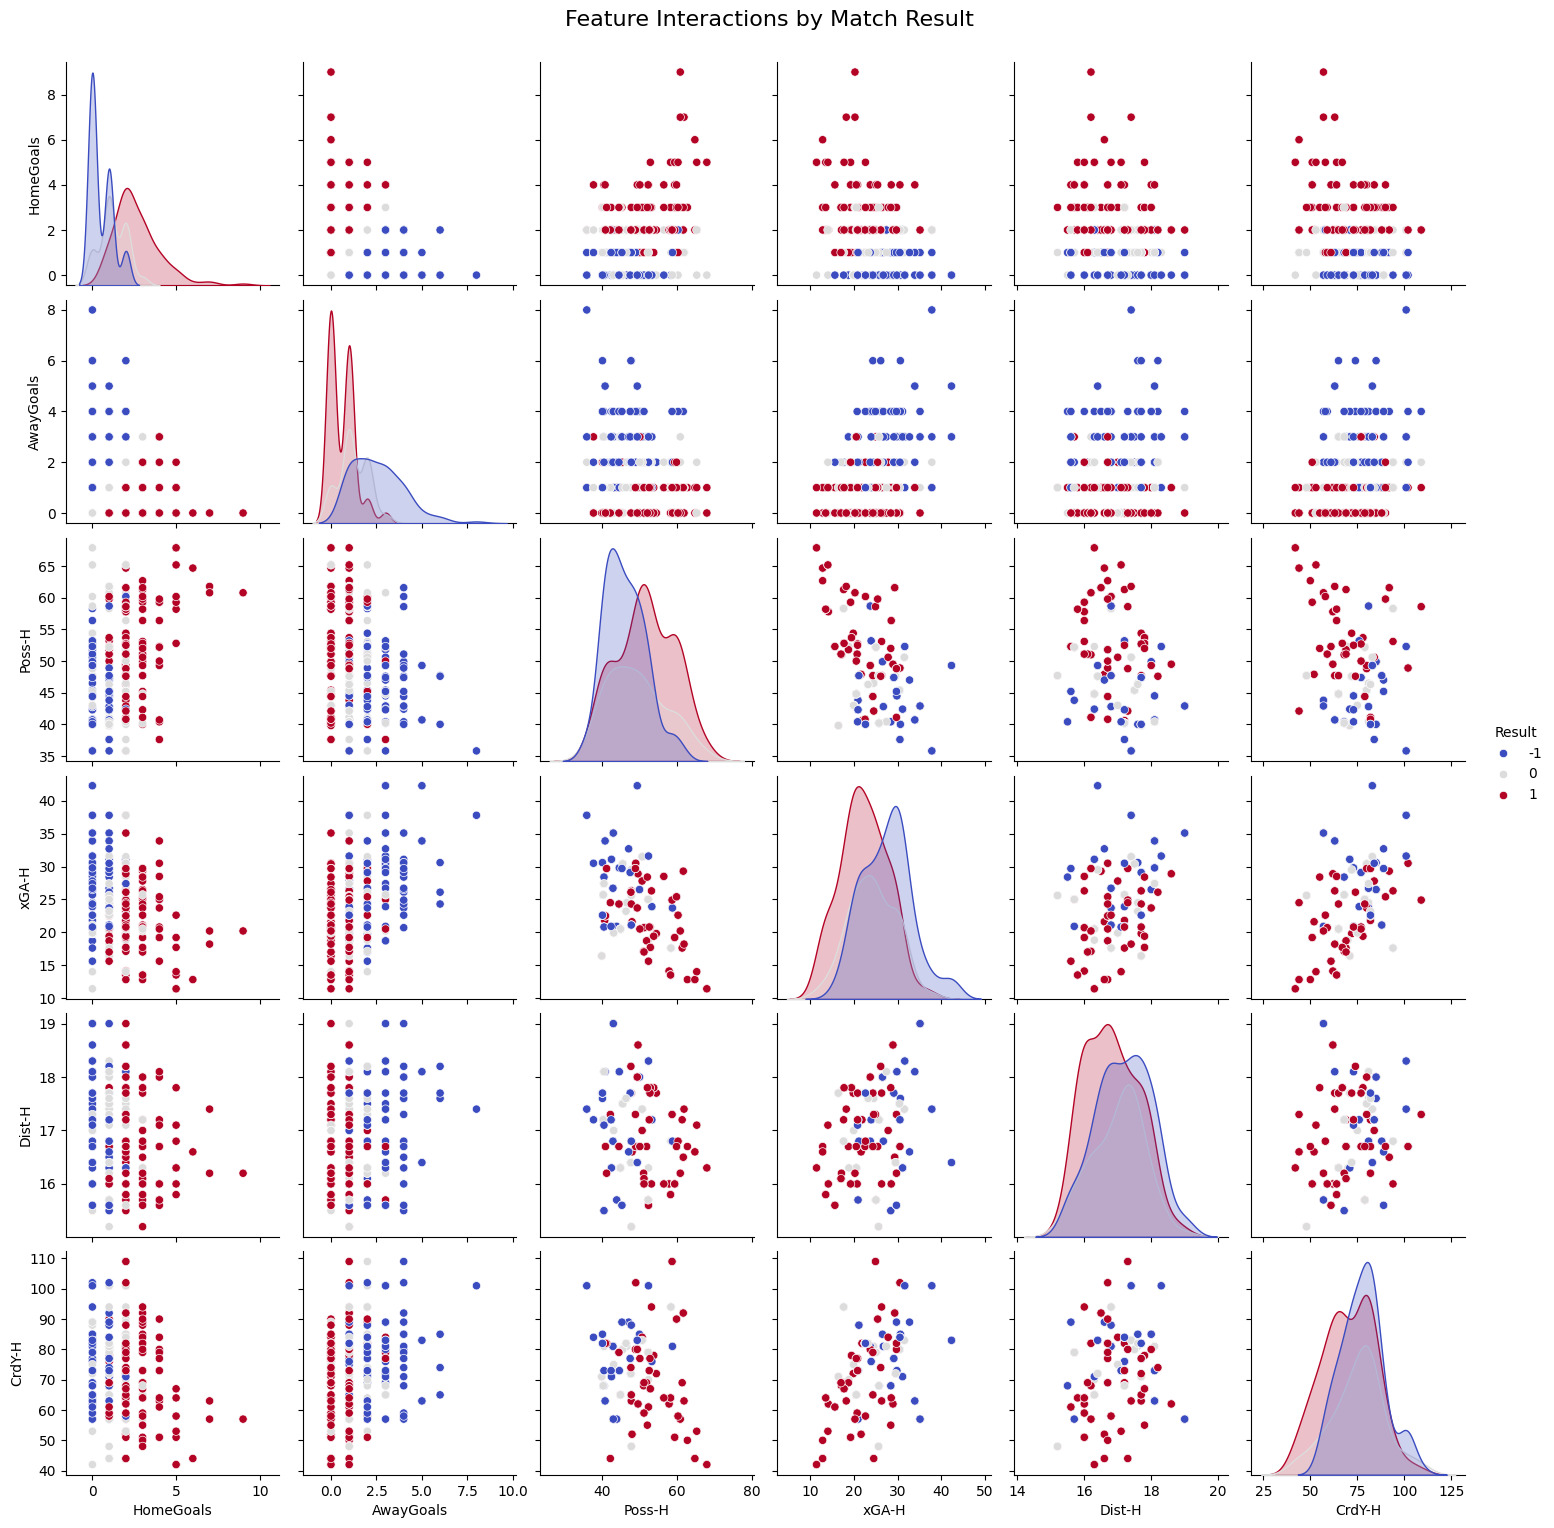

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a handful of useful features for visualization
selected_cols = [
    'Result',          # target
    'HomeGoals',       # direct outcome
    'AwayGoals',
    'Poss-H',          # possession
    'xGA-H',           # expected goals against
    'Dist-H',          # average shot distance
    'xG+A-A',          # xG + xA away (if retained)
    'CrdY-H'           # discipline
]

# Keep only those that exist
selected_cols = [col for col in selected_cols if col in df_reduced.columns]

# Sample small subset for faster plotting (optional)
sample_df = df_reduced[selected_cols].sample(n=300, random_state=42)

# Plot
sns.pairplot(sample_df, hue='Result', palette='coolwarm', diag_kind='kde')
plt.suptitle("Feature Interactions by Match Result", y=1.02, fontsize=16)
plt.show()


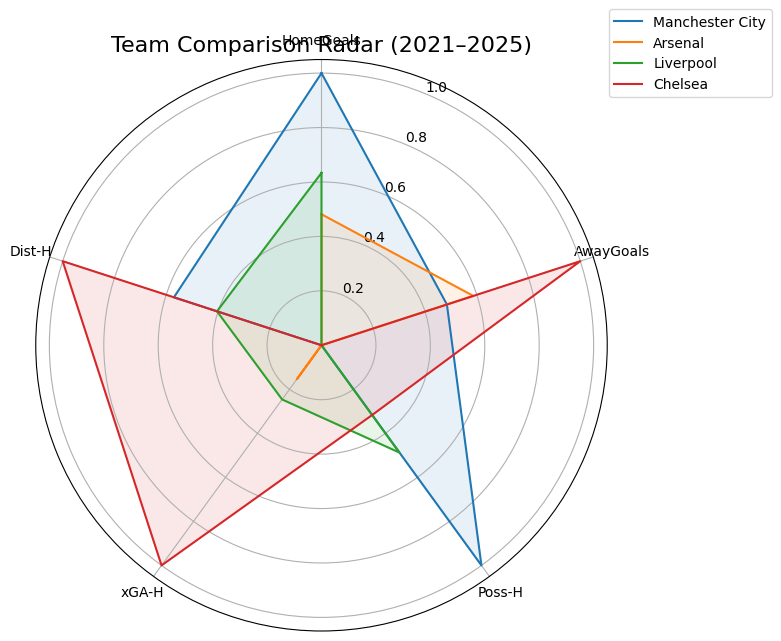

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Select teams to compare
teams_to_compare = ['Manchester City', 'Arsenal', 'Liverpool', 'Chelsea']

# Choose key features
features = [
    'HomeGoals',       # Offensive power
    'AwayGoals',       # Defensive solidity (inverse)
    'Poss-H',          # Ball possession
    'xGA-H',           # Expected goals conceded
    'Dist-H'           # Average shot distance
]

# Aggregate averages per team (consider Home matches)
team_avg = df_reduced[df_reduced['Home'].isin(teams_to_compare)].groupby('Home')[features].mean()

# Normalize feature scales (optional: [0,1] scaling for better radar shape)
team_avg_normalized = (team_avg - team_avg.min()) / (team_avg.max() - team_avg.min())

# Setup for radar chart
labels = features
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Initialize plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each team
for team in teams_to_compare:
    values = team_avg_normalized.loc[team].tolist()
    values += values[:1]  # repeat first value to close the circle
    ax.plot(angles, values, label=team)
    ax.fill(angles, values, alpha=0.1)

# Style the radar chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('Team Comparison Radar (2021–2025)', size=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


<ipython-input-44-1fa16d22a855>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-44-1fa16d22a855>:17: UserWarning:

Glyph 127967 (\N{STADIUM}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127967 (\N{STADIUM}) missing from font(s) DejaVu Sans.



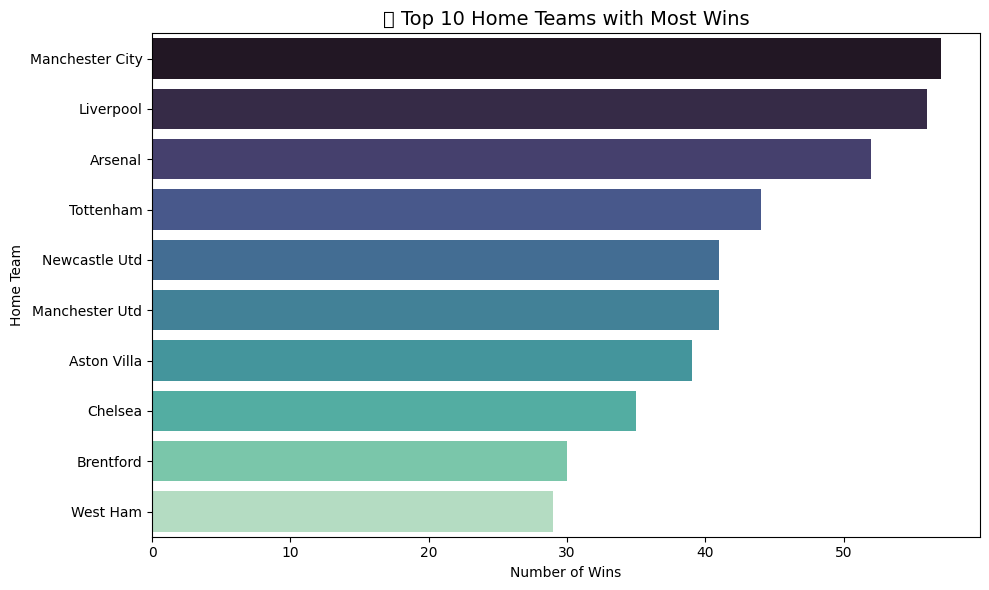

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for home wins only
home_wins = df_reduced[df_reduced['Result'] == 1]

# Count home wins per team
home_win_counts = home_wins['Home'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=home_win_counts.values, y=home_win_counts.index, palette='mako')

plt.title("🏟️ Top 10 Home Teams with Most Wins", fontsize=14)
plt.xlabel("Number of Wins")
plt.ylabel("Home Team")
plt.tight_layout()
plt.show()
